# Taylor problem 2.20 Template

last revised: 08-Jan-2019 by Dick Furnstahl [furnstahl.1@osu.edu]

**This is a template for solving problem 2.20.  Go through and fill in the blanks where ### appears.**

The goal of this problem is to plot and comment on the trajectory of a projectile subject to linear air resistance, considering four different values of the drag coefficient.  

The problem statement fixes the initial angle above the horizontal and suggests using convenient values for the initial speed (magnitude of the velocity) and gravitational strength $g$.  We'll set up the problem more generally and look at special cases.

The equations are derived in the book:

$$\begin{align}
  x(t) &= v_{x0}\tau (1 - e^{-t/\tau}) \\
  y(t) &= (v_{y0} + v_{\textrm{ter}}) \tau (1 - e^{-t/\tau}) - v_{\textrm{ter}} t
\end{align}$$

where $v_{\textrm{ter}} = g\tau$.

Plan:
1. Define functions for $x$ and $y$, which will depend on $t$, $\tau$, $g$, and the initial velocity.  Make the functions look like the equations from Taylor to reduce the possibility of error.
2. Set up an array of the time $t$.
3. Determine $x$ and $y$ arrays for different values of $\tau$.
4. Make a plot of $y$ versus $x$ for each value of $\tau$, all on the same plot.
5. Save the plot for printing.

In [1]:
### What modules do we need to import? (Can always add more later!)
import numpy as np

### 1. Define functions for $x$ and $y$

In [40]:
def x_traj(t, tau, v_x0=1., g=1.):
    """Horizontal position x(t) from equation (2.36) in Taylor.
       The initial position at t=0 is x=y=0.
    """
    return v_x0 * tau * (1. - np.exp(-t/tau))

def y_traj(t, tau, v_y0=1., g=1.):
    """Vertical position y(t) from equation (2.36) in Taylor.
       The initial position at t=0 is x=y=0.
    """
    v_ter = g * tau
    return (v_y0 + v_ter) * tau * (1. - np.exp(-t/tau)) - v_ter*t

### 2. Set up an array of the time $t$

In [61]:
t_min = 0.
t_max = 3.
delta_t = 0.00001      ### pick a reasonable delta_t
t_pts = np.arange(-1, 101)  ### fill in the blanks
t_pts  # check that we did what we thought!

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

### 3., 4. Make $x$ and $y$ arrays for different $\tau$ and plot

In [62]:
%matplotlib inline
### What module(s) should you import?
import matplotlib.pyplot as plt

In [63]:
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
# generate some integers
def x_pts_fnc(x):
    for _ in range(x):
        x_pts = randint(0, 10)

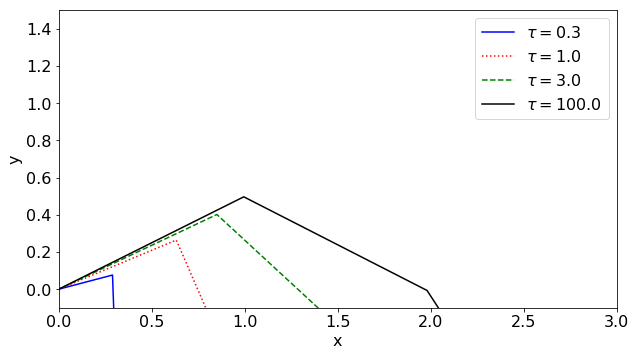

In [69]:
plt.rcParams.update({'font.size': 16})  # This is to boost the font size

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)   ### How do you create a single subplot?

tau_1 = 0.3
ax.plot(x_traj(t_pts, tau_1), y_traj(t_pts, tau_1), 'b-',
        label=r'$\tau = 0.3$')

tau_2 = 1.0
ax.plot(x_traj(t_pts, tau_2), y_traj(t_pts, tau_2), 'r:', 
        label=r'$\tau = 1.0$')

tau_3 = 3.0
ax.plot(x_traj(t_pts, tau_3), y_traj(t_pts, tau_3),  'g--',
        label=r'$\tau = 3.0$')
### plot a line with tau_3 and line type 'g--' with a label

tau_4 = 100.
ax.plot(x_traj(t_pts, tau_4), y_traj(t_pts, tau_4),  'k-',
        label=r'$\tau = 100.0$')
### plot a line with tau_4 and line type 'k- with a label


ax.set_ylim(-0.1, 1.5)
ax.set_xlim(0., 3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect(1)  # so that the x and y spacing is the same

ax.legend();


### 5. Save the plot for printing

In [65]:
# save the figure
fig.savefig('Taylor_prob_2.20.png', bbox_inches='tight')
### Find the figure file and display it in your browser, then save or print. 
### Check you graph against the one from the next section.

## More advanced python: plot again with a loop

Now do it as a loop, cycling through properties, and add a vertical line at the asymptotic distance.

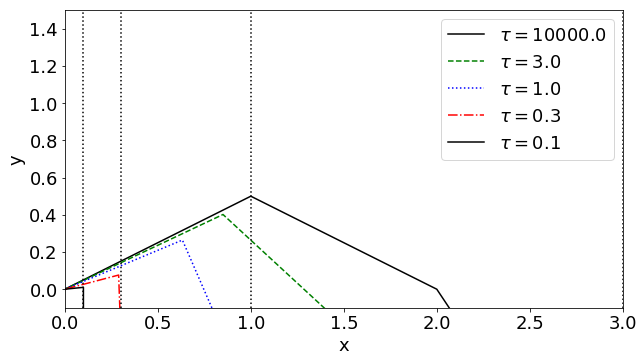

In [68]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

from cycler import cycler
my_cycler = (cycler(color=['k', 'g', 'b', 'r']) +
             cycler(linestyle=['-', '--', ':', '-.']))


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_prop_cycle(my_cycler)

v_x0 = 1.
tau_list = [10000, 3.0, 1.0, 0.3, 0.1]
for tau in tau_list:
    ax.plot(x_traj(t_pts, tau), y_traj(t_pts, tau),  
            label=rf'$\tau = {tau:.1f}$')
    ax.axvline(v_x0 * tau, color='black', linestyle='dotted')

ax.set_ylim(-0.1, 1.5)
ax.set_xlim(0., 3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect(1)  # so that the x and y spacing is the same

ax.legend();


**If it is new to you, look up how a for loop in Python works and try to figure out what is happening here.  Ask if you are confused!**